# Checkpoint 1 
## (Do not remove any comments that start with"# @@@".) 

Reminder: 

- You are being evaluated for completion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.
- Please do not remove any comment that starts with: "# @@@". 

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>).


Include comments throughout your code! Every cleanup and preprocessing task should be documented.


<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Suppress Pandas SettingWithCopyWarning
pd.options.mode.chained_assignment = None

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [ ]:
df = pd.read_csv("../data/states_edu.csv")
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [ ]:
df.rename({
    "GRADES_PK_G":"ENROLL_PREK",
    "GRADES_KG_G":"ENROLL_KINDER",
    "GRADES_4_G":"ENROLL_4",
    "GRADES_8_G":"ENROLL_8",
    "GRADES_12_G":"ENROLL_12",
    "GRADES_1_8_G":"ENROLL_PRIMARY",
    "GRADES_9_12_G":"ENROLL_HS",
    "GRADES_ALL_G":"ENROLL_ALL",
    "ENROLL":"ENROLL_ALL_EST"
    },
    axis=1,inplace=True)

df.dropna(subset=["AVG_MATH_4_SCORE"], inplace=True)

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen one of Grade 4 Reading, Grade 4 Math, or Grade 8 Math to focus on: *Grade 4 Math*

How many years of data are logged in our dataset? 

In [20]:
# @@@ 1
df["YEAR"].nunique()

13

Let"s compare Michigan to Ohio. Which state has the higher average across all years in the test you chose?

In [47]:
# @@@ 2
df_OHMI = df[df["STATE"].isin(["MICHIGAN", "OHIO"])]
avg_OHMI = df_OHMI.groupby("STATE")["AVG_MATH_4_SCORE"].mean()
print(avg_OHMI)
"OHIO"

STATE
MICHIGAN    234.363636
OHIO        239.454545
Name: AVG_MATH_4_SCORE, dtype: float64


'OHIO'

Find the average for your chosen test across all states in 2019

In [ ]:
# @@@ 3
df[df["YEAR"] == 2019]["AVG_MATH_4_SCORE"].mean()

np.float64(239.9433962264151)

For each state, find a maximum value for your chosen test score

In [49]:
# @@@ 4
df.groupby("STATE")["AVG_MATH_4_SCORE"].max()

STATE
ALABAMA                 233.0
ALASKA                  237.0
ARIZONA                 240.0
ARKANSAS                240.0
CALIFORNIA              235.0
COLORADO                247.0
CONNECTICUT             245.0
DELAWARE                243.0
DISTRICT_OF_COLUMBIA    235.0
DODEA                   250.0
FLORIDA                 246.0
GEORGIA                 240.0
HAWAII                  243.0
IDAHO                   242.0
ILLINOIS                239.0
INDIANA                 249.0
IOWA                    246.0
KANSAS                  248.0
KENTUCKY                242.0
LOUISIANA               234.0
MAINE                   246.0
MARYLAND                247.0
MASSACHUSETTS           253.0
MICHIGAN                238.0
MINNESOTA               253.0
MISSISSIPPI             241.0
MISSOURI                241.0
MONTANA                 244.0
NATIONAL                242.0
NEBRASKA                246.0
NEVADA                  237.0
NEW_HAMPSHIRE           253.0
NEW_JERSEY              249.0
NEW_

*Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [ ]:
# @@@ 5
df["SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT"] = df["SUPPORT_SERVICES_EXPENDITURE"] / df["ENROLL_ALL"]
df["INSTRUCTION_EXPENDITURE_PER_STUDENT"] = df["INSTRUCTION_EXPENDITURE"] / df["ENROLL_ALL"]

Feature engineering justification: **<I added 2 Expenditure per student columns, one for support services, and one for instruction, because both of those statistics may affect the scores for the students\>**

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

Text(0, 0.5, '4th Grade Math Score')

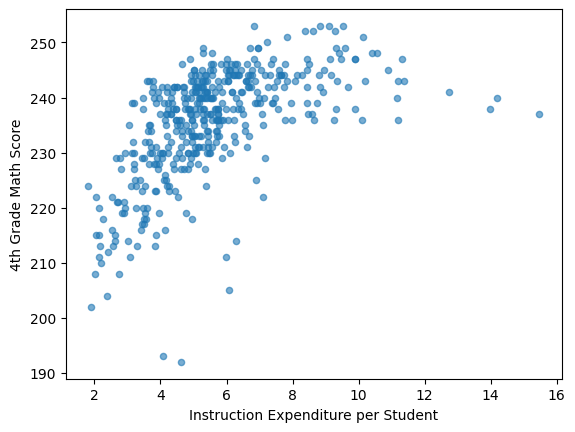

In [ ]:
# @@@ 6
df.plot.scatter(x="INSTRUCTION_EXPENDITURE_PER_STUDENT", y="AVG_MATH_4_SCORE", alpha=0.6)
plt.xlabel("Instruction Expenditure per Student")
plt.ylabel("4th Grade Math Score")

**<Up until 8-10, there is a clear positive correlation between Instruction Expenditure per Student and Average 4th Grade Math Score, and after that, there seems to be no more apparent increase in average 4th grade math score for increase in instruction expenditure per student.>**

**Visualization 2**

Text(0, 0.5, '4th Grade Math Score')

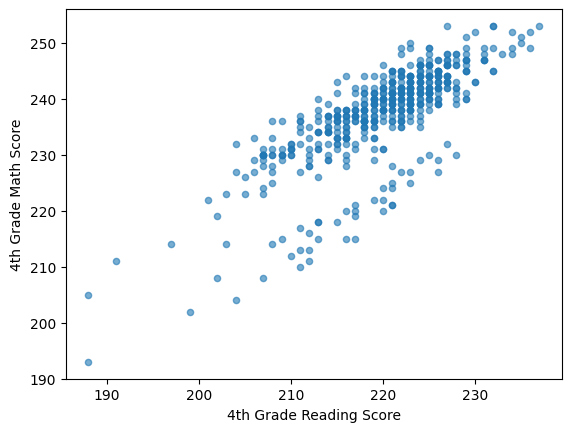

In [ ]:
# @@@ 7
df.plot.scatter(x="AVG_READING_4_SCORE", y="AVG_MATH_4_SCORE", alpha=0.6)
plt.xlabel("4th Grade Reading Score")
plt.ylabel("4th Grade Math Score")

**<There is a clear positive correlation between 4th grade reading score and 4th grade math score>**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
# @@@ 8

X = df[["SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT","INSTRUCTION_EXPENDITURE_PER_STUDENT","AVG_READING_4_SCORE"]].dropna()
y = df.loc[X.index]["AVG_MATH_4_SCORE"]
y.fillna(y.median(), inplace=True)

In [60]:
# @@@ 9 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [61]:
# @@@ 10
from sklearn.ensemble import RandomForestRegressor


In [64]:
# @@@ 11
# create your model here
model = RandomForestRegressor()

In [65]:
model.fit(X_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsample

In [66]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [82]:
# @@@ 12
print(f"R squared is {model.score(X_test, y_test)}")
print(f"Mean absolute error is {np.mean(np.abs(model.predict(X_test)-y_test))}")


R squared is 0.7821404177781592
Mean absolute error is 3.444583333333332


We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

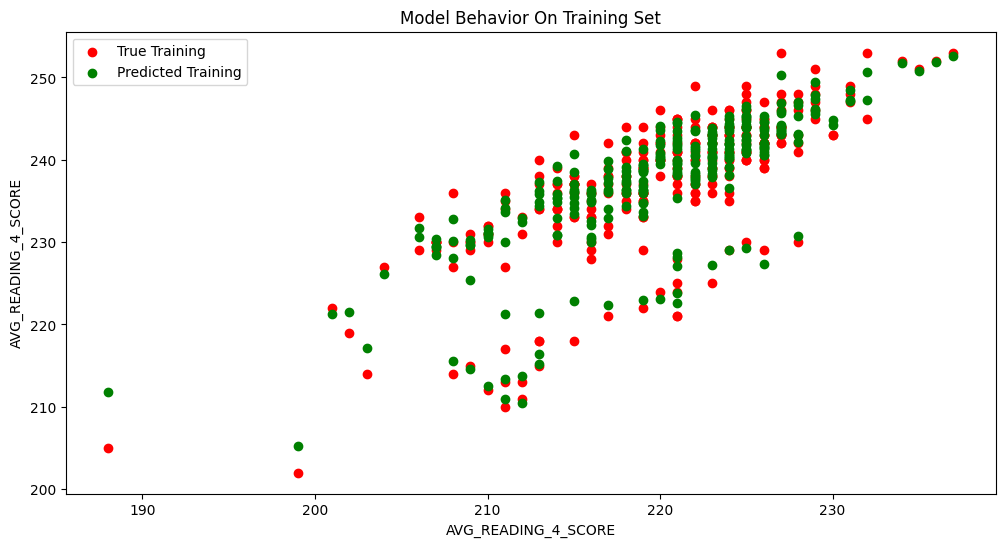

In [69]:
# @@@ 13

col_name = "AVG_READING_4_SCORE"


f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(["True Training","Predicted Training"])
plt.xlabel(col_name)
plt.ylabel("AVG_READING_4_SCORE")
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

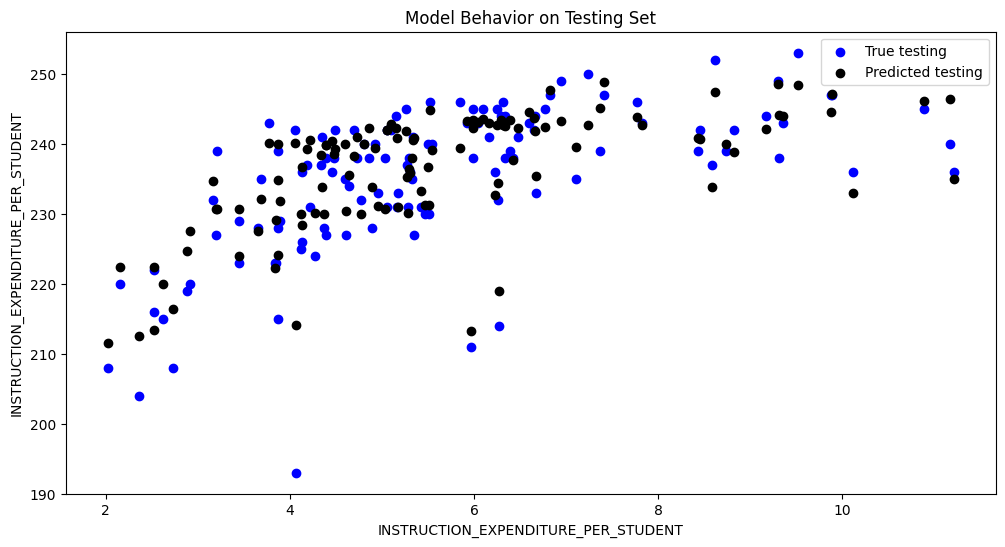

In [70]:
# @@@ 14


col_name = "INSTRUCTION_EXPENDITURE_PER_STUDENT"


f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(["True testing","Predicted testing"])
plt.xlabel(col_name)
plt.ylabel("INSTRUCTION_EXPENDITURE_PER_STUDENT")
plt.title("Model Behavior on Testing Set")